# Wine Quality Analysis

In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn import tree


In [2]:
from IPython.core.interactiveshell import InteractiveShell

In [3]:
df=pd.read_csv("wine_dataset.csv")

# Exploratory Analysis

In [4]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
df.info()
df.shape
df.columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed_acidity           6497 non-null float64
volatile_acidity        6497 non-null float64
citric_acid             6497 non-null float64
residual_sugar          6497 non-null float64
chlorides               6497 non-null float64
free_sulfur_dioxide     6497 non-null float64
total_sulfur_dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
style                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 634.5+ KB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
#Encoding Quality variable to Low medium and High
df['quality_label'] = df['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')

In [7]:
subset_attributes = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
ls = round(df[df['quality_label'] == 'low'][subset_attributes].describe(),2)
ms = round(df[df['quality_label'] == 'medium'][subset_attributes].describe(),2)
hs = round(df[df['quality_label'] == 'high'][subset_attributes].describe(),2)
pd.concat([ls, ms, hs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine','High Quality Wine'])

Low Quality Wine                                                        \
         fixed_acidity volatile_acidity citric_acid residual_sugar chlorides   
count          2384.00          2384.00     2384.00        2384.00   2384.00   
mean              7.33             0.40        0.30           5.65      0.06   
std               1.27             0.19        0.16           4.92      0.04   
min               4.20             0.10        0.00           0.60      0.01   
25%               6.50             0.26        0.21           1.80      0.04   
50%               7.10             0.34        0.30           2.90      0.05   
75%               7.80             0.50        0.40           8.52      0.08   
max              15.90             1.58        1.00          23.50      0.61   

                                                                            \
      free_sulfur_dioxide total_sulfur_dioxide  density       pH sulphates   
count             2384.00              2384.00  2384.00  2384.00   2384.00   
mean                29.48               119.28     1.00     3.21      0.52   
std                 19.84                61.89     0.00     0.16      0.14   
min                  2.00                 6.00     0.99     2.74      0.25   
25%                 14.00                68.00     0.99     3.11      0.44   
50%                 26.00               124.00     1.00     3.20      0.50   
75%                 42.00               167.00     1.00     3.31      0.58   
max                289.00               440.00     1.00     3.90      2.00   

        ...   High Quality Wine                                               \
        ...         citric_acid residual_sugar chlorides free_sulfur_dioxide   
count   ...              198.00         198.00    198.00              198.00   
mean    ...                0.33           5.35      0.04               34.51   
std     ...                0.10           4.16      0.02               17.08   
min     ...                0.03           0.80      0.01                3.00   
25%     ...                0.28           2.00      0.03               24.00   
50%     ...                0.32           4.05      0.04               34.00   
75%     ...                0.37           7.57      0.04               43.00   
max     ...                0.74          14.80      0.12              105.00   

                                                                      
      total_sulfur_dioxide density      pH sulphates alcohol quality  
count               198.00  198.00  198.00    198.00  198.00  198.00  
mean                117.48    0.99    3.23      0.51   11.69    8.03  
std                  41.69    0.00    0.16      0.16    1.27    0.16  
min                  12.00    0.99    2.88      0.25    8.50    8.00  
25%                  96.00    0.99    3.13      0.38   11.00    8.00  
50%                 118.50    0.99    3.23      0.48   12.00    8.00  
75%                 145.00    0.99    3.33      0.60   12.60    8.00  
max                 212.50    1.00    3.72      1.10   14.00    9.00  

[8 rows x 36 columns]

In [8]:
subset_attributes = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
rs = round(df[df['style'] == 'red'][subset_attributes].describe(),2)
ws = round(df[df['style'] == 'white'][subset_attributes].describe(),2)

pd.concat([rs, ws], axis=1, keys=['Red Wine', 'White Wine'])

Red Wine                                                        \
      fixed_acidity volatile_acidity citric_acid residual_sugar chlorides   
count       1599.00          1599.00     1599.00        1599.00   1599.00   
mean           8.32             0.53        0.27           2.54      0.09   
std            1.74             0.18        0.19           1.41      0.05   
min            4.60             0.12        0.00           0.90      0.01   
25%            7.10             0.39        0.09           1.90      0.07   
50%            7.90             0.52        0.26           2.20      0.08   
75%            9.20             0.64        0.42           2.60      0.09   
max           15.90             1.58        1.00          15.50      0.61   

                                                                            \
      free_sulfur_dioxide total_sulfur_dioxide  density       pH sulphates   
count             1599.00              1599.00  1599.00  1599.00   1599.00   
mean                15.87                46.47     1.00     3.31      0.66   
std                 10.46                32.90     0.00     0.15      0.17   
min                  1.00                 6.00     0.99     2.74      0.33   
25%                  7.00                22.00     1.00     3.21      0.55   
50%                 14.00                38.00     1.00     3.31      0.62   
75%                 21.00                62.00     1.00     3.40      0.73   
max                 72.00               289.00     1.00     4.01      2.00   

        ...     White Wine                                               \
        ...    citric_acid residual_sugar chlorides free_sulfur_dioxide   
count   ...        4898.00        4898.00   4898.00             4898.00   
mean    ...           0.33           6.39      0.05               35.31   
std     ...           0.12           5.07      0.02               17.01   
min     ...           0.00           0.60      0.01                2.00   
25%     ...           0.27           1.70      0.04               23.00   
50%     ...           0.32           5.20      0.04               34.00   
75%     ...           0.39           9.90      0.05               46.00   
max     ...           1.66          65.80      0.35              289.00   

                                                                          
      total_sulfur_dioxide  density       pH sulphates  alcohol  quality  
count              4898.00  4898.00  4898.00   4898.00  4898.00  4898.00  
mean                138.36     0.99     3.19      0.49    10.51     5.88  
std                  42.50     0.00     0.15      0.11     1.23     0.89  
min                   9.00     0.99     2.72      0.22     8.00     3.00  
25%                 108.00     0.99     3.09      0.41     9.50     5.00  
50%                 134.00     0.99     3.18      0.47    10.40     6.00  
75%                 167.00     1.00     3.28      0.55    11.40     6.00  
max                 440.00     1.04     3.82      1.08    14.20     9.00  

[8 rows x 24 columns]

In [9]:
#Missing values

In [10]:
#Correlation
df_corr=df.corr()
df_corr


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


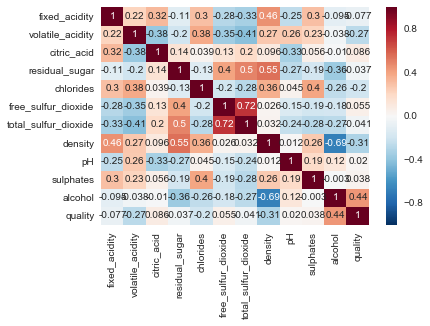

In [11]:
sns.heatmap(df_corr,annot=True)

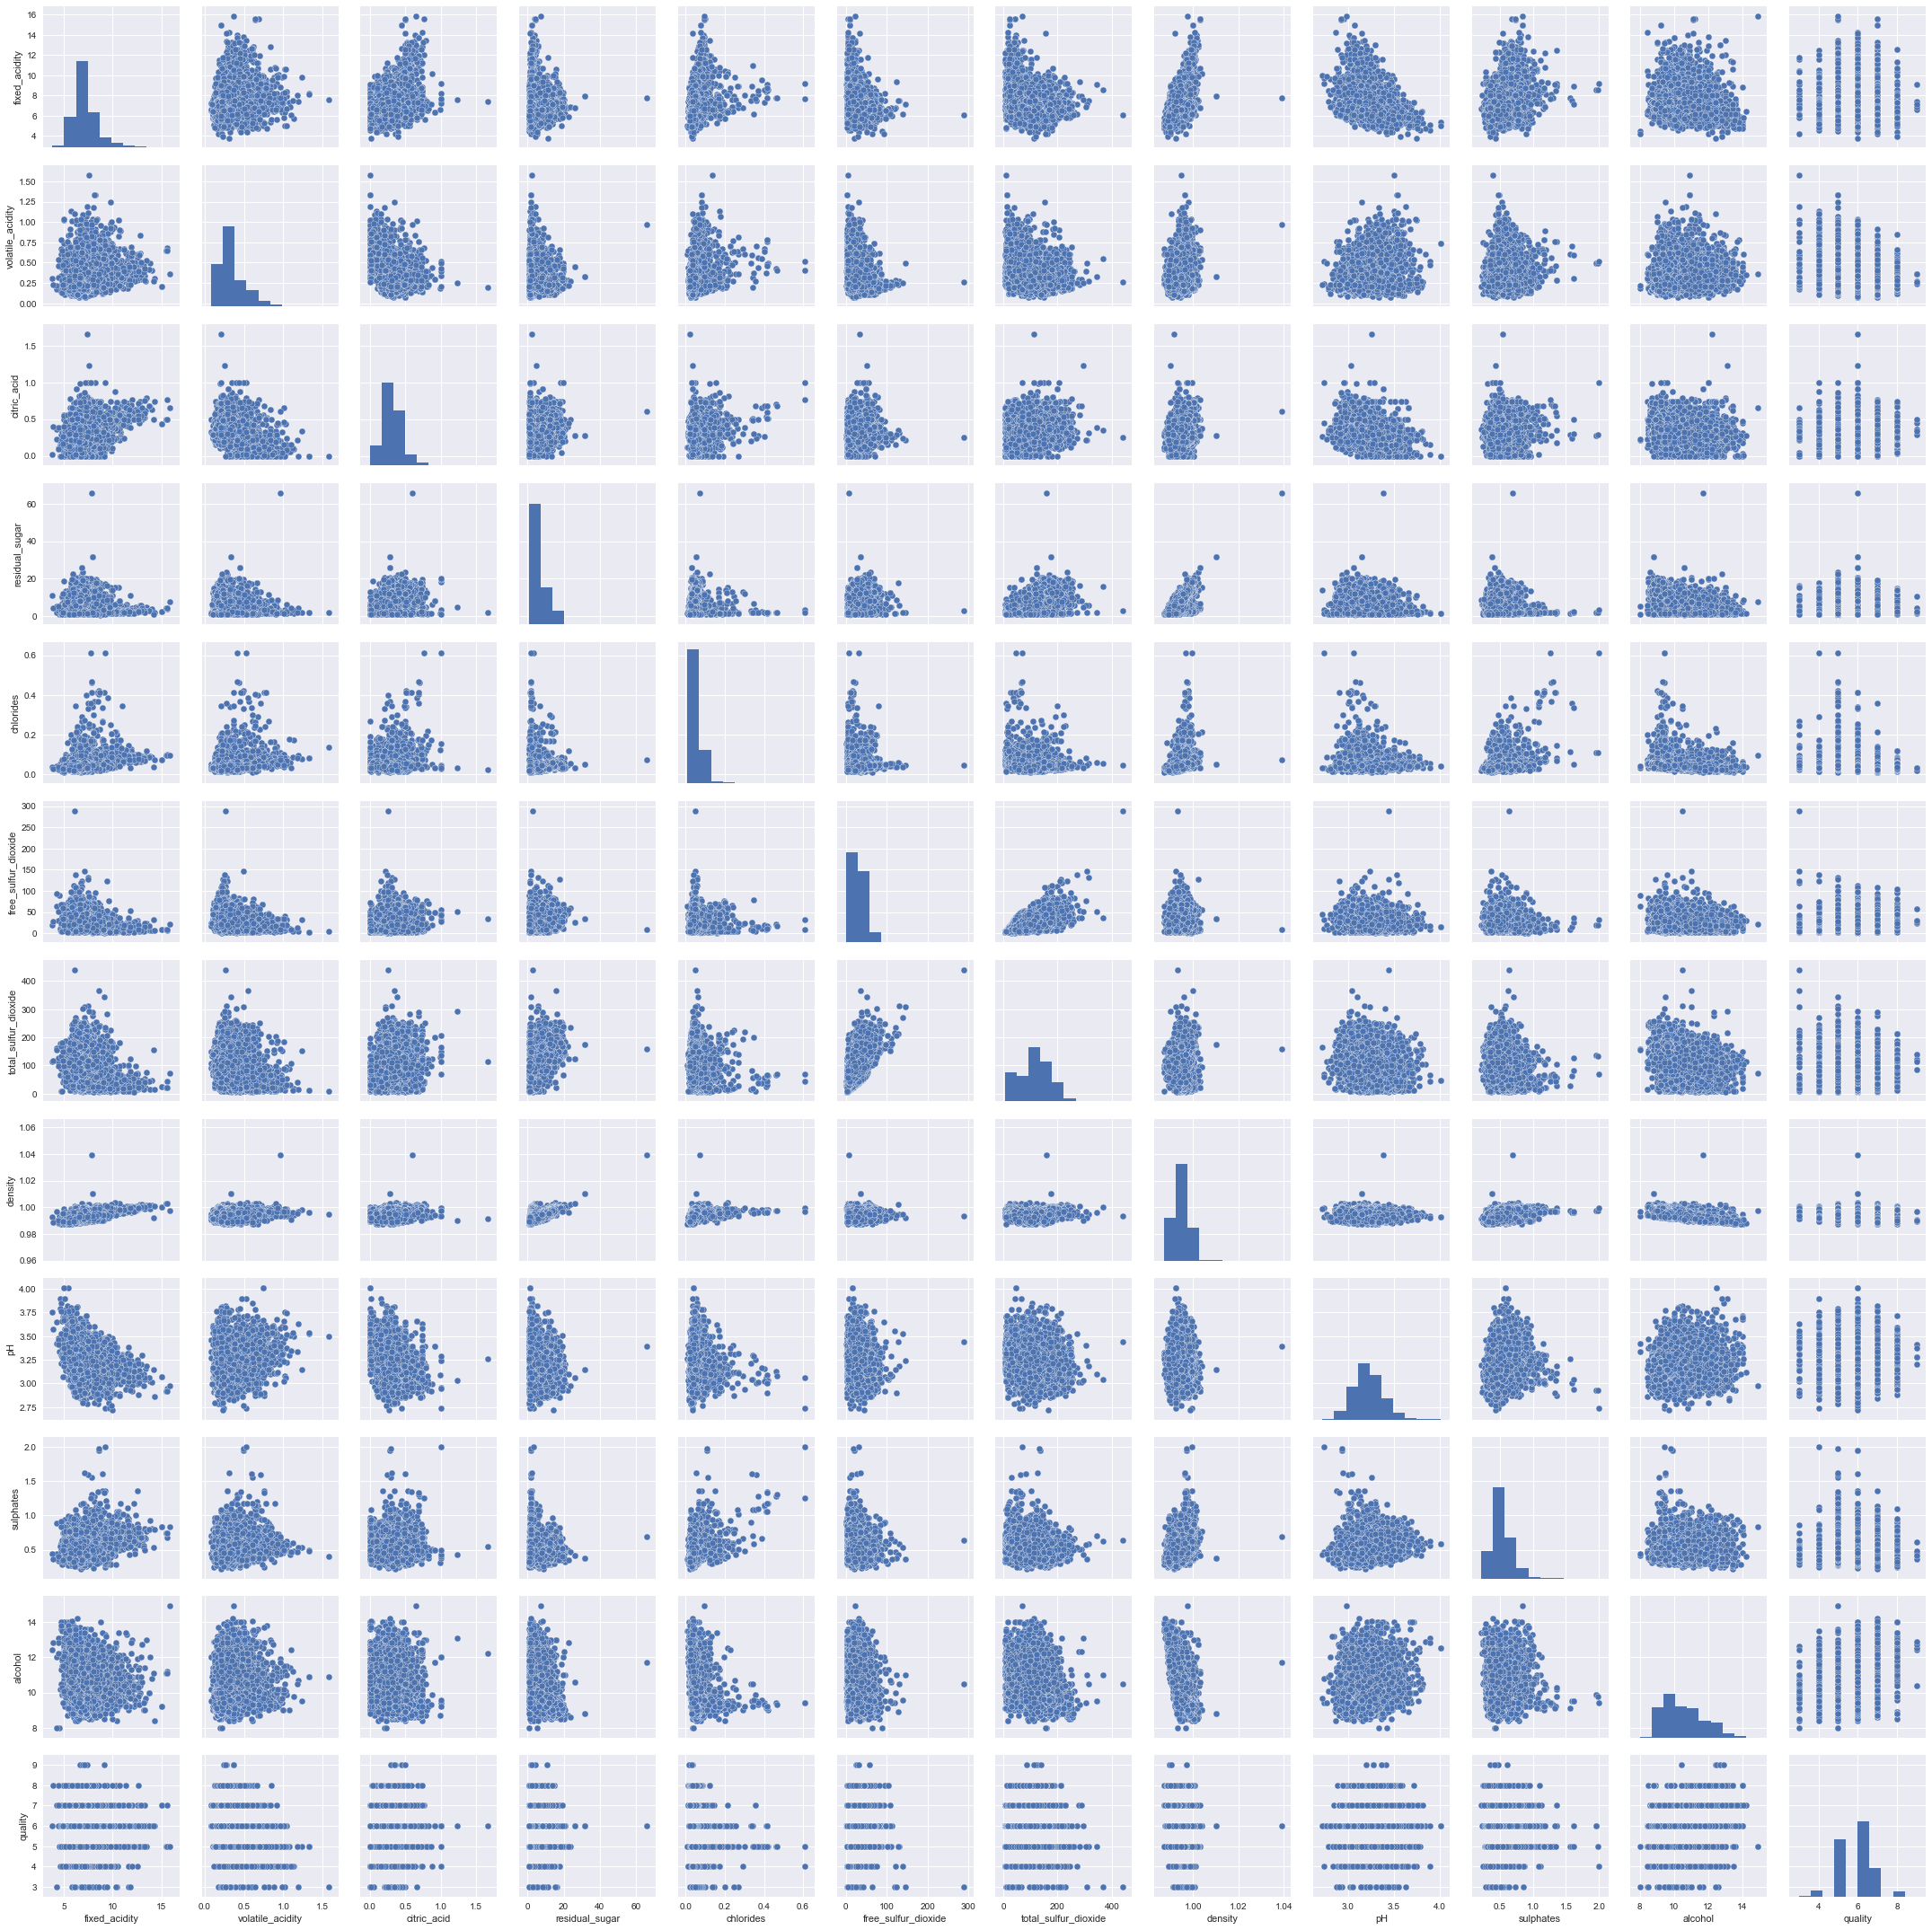

In [12]:
sns.pairplot(df)

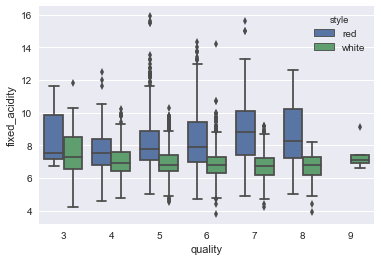

In [13]:
sns.boxplot(x="quality",y="fixed_acidity",hue="style",data=df)

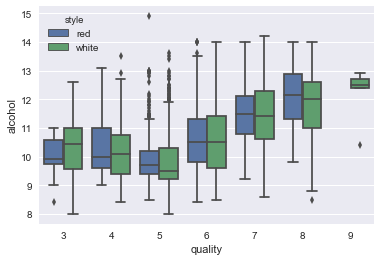

In [14]:
sns.boxplot(x="quality",y="alcohol",hue="style",data=df)

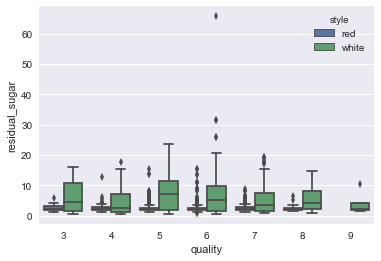

In [15]:
sns.boxplot(x="quality",y="residual_sugar",hue="style",data=df)

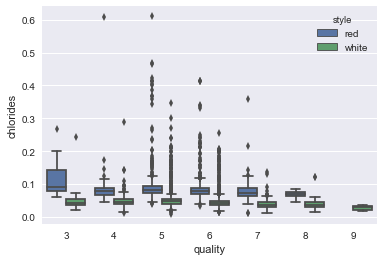

In [16]:
sns.boxplot(x="quality",y="chlorides",hue="style",data=df)

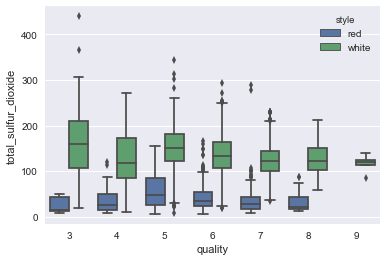

In [17]:
sns.boxplot(x="quality",y="total_sulfur_dioxide",hue="style",data=df)

In [18]:
#Modeling 

In [19]:

from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [20]:
import model_evaluation_utils as meu

In [21]:
features = df.iloc[:,:-3]
class_labels = np.array(df['quality_label'])
label_names = ['low', 'medium', 'high']
feature_names = list(features.columns)
train_X, test_X, train_y, test_y = train_test_split(features,class_labels, test_size=0.3, random_state=42)

print(Counter(train_y), Counter(test_y))
print('Features:', feature_names)

Counter({'medium': 2706, 'low': 1693, 'high': 148}) Counter({'medium': 1209, 'low': 691, 'high': 50})
Features: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [22]:
# Define the scaler
ss = StandardScaler().fit(train_X)
# Scale the train set
train_SX = ss.transform(train_X)
# Scale the test set
test_SX = ss.transform(test_X)

In [23]:
from sklearn.tree import DecisionTreeClassifier
# train the model
dt = DecisionTreeClassifier()
dt.fit(train_SX, train_y)
 # predict and evaluate performance
dt_predictions = dt.predict(test_SX)
meu.display_model_performance_metrics(true_labels=test_y,predicted_labels=dt_predictions,classes=label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.7256
Precision: 0.7309
Recall: 0.7256
F1 Score: 0.728

Model Classification report:
------------------------------
             precision    recall  f1-score   support

        low       0.66      0.67      0.67       691
     medium       0.79      0.77      0.78      1209
       high       0.25      0.34      0.29        50

avg / total       0.73      0.73      0.73      1950


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual: low           463    217   11
        medium        235    935   39
        high            2     31   17


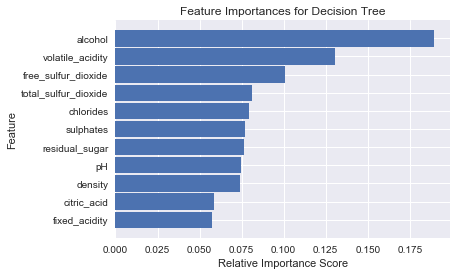

In [46]:
dt_feature_importances = dt.feature_importances_
dt_feature_names, dt_feature_scores = zip(*sorted(zip(feature_names,dt_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(dt_feature_names)))
plt.barh(y_position, dt_feature_scores, height=0.9, align='center')
plt.yticks(y_position , dt_feature_names)
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')

In [25]:
from graphviz import Source
from sklearn import tree
from IPython.display import Image

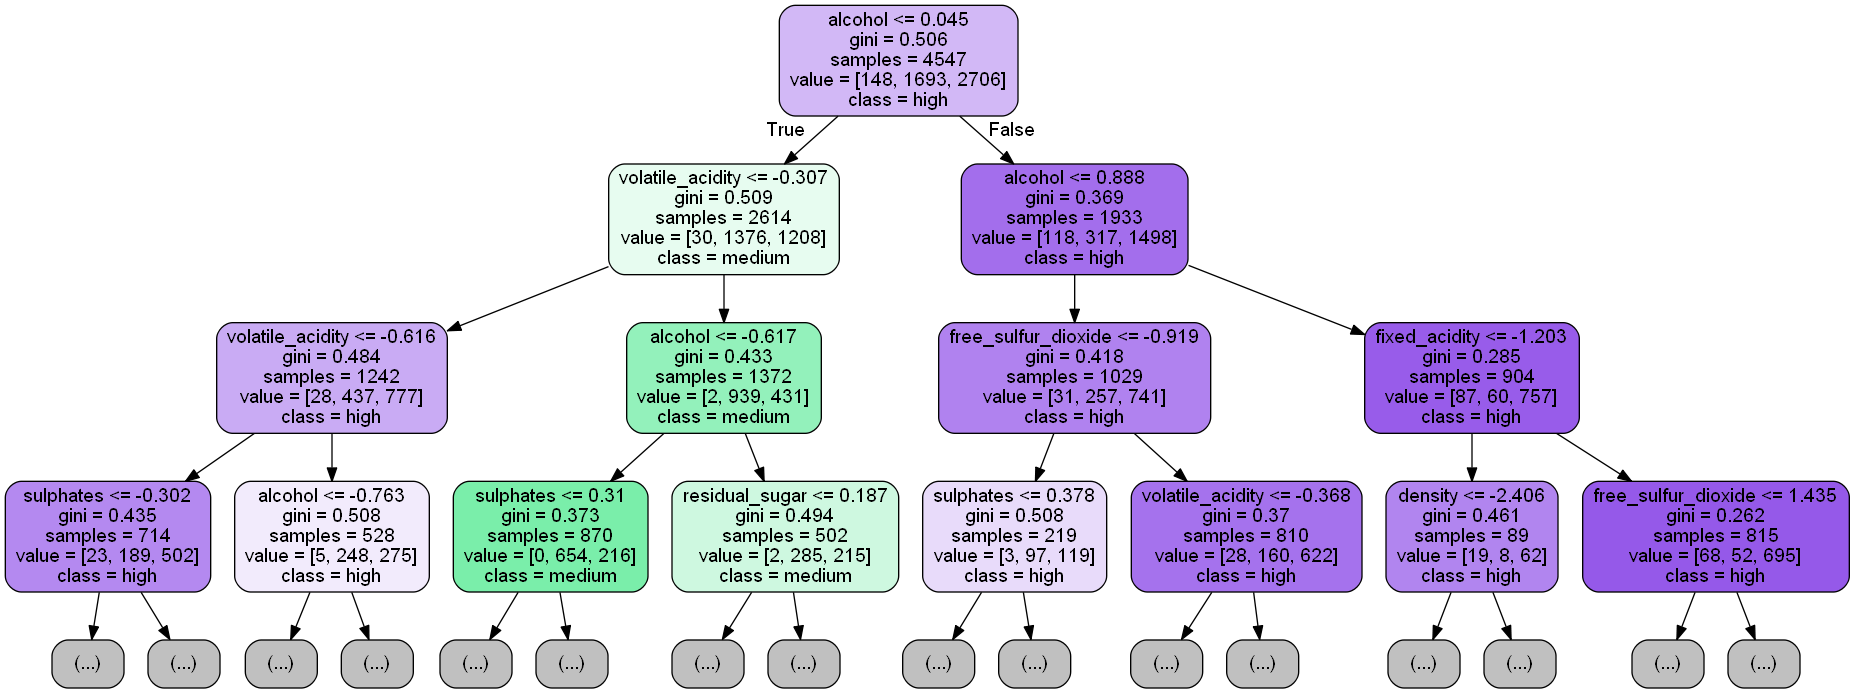

In [40]:
graph = Source(tree.export_graphviz(dt, out_file=None, class_names=label_names,filled=True, rounded=True, special_characters=False,feature_names=feature_names, max_depth=3))
png_data = graph.pipe(format='png')
with open('dtree_structure.png','wb') as f:
    f.write(png_data)
Image(png_data)

In [29]:
from sklearn.ensemble import RandomForestClassifier
 # train the model
rf = RandomForestClassifier()
rf.fit(train_SX, train_y)
 # predict and evaluate performance
rf_predictions = rf.predict(test_SX)
meu.display_model_performance_metrics(true_labels=test_y, predicted_labels=rf_predictions, classes=label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.7872
Precision: 0.7904
Recall: 0.7872
F1 Score: 0.7849

Model Classification report:
------------------------------
             precision    recall  f1-score   support

        low       0.71      0.77      0.74       691
     medium       0.83      0.82      0.83      1209
       high       0.82      0.28      0.42        50

avg / total       0.79      0.79      0.78      1950


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual: low           530    161    0
        medium        215    991    3
        high            0     36   14


In [30]:
print(rf.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200, 300, 500],'max_features': ['auto', None, 'log2'] }
clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
clf.fit(train_SX, train_y)
print(clf.best_params_)

{'max_features': 'auto', 'n_estimators': 100}


In [32]:
results = clf.cv_results_
for param, score_mean, score_sd in zip(results['params'], results['mean_test_score'],results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

{'max_features': 'auto', 'n_estimators': 100} 0.7957 0.0115
{'max_features': 'auto', 'n_estimators': 200} 0.7909 0.0118
{'max_features': 'auto', 'n_estimators': 300} 0.7909 0.0124
{'max_features': 'auto', 'n_estimators': 500} 0.7935 0.0105
{'max_features': None, 'n_estimators': 100} 0.7818 0.0117
{'max_features': None, 'n_estimators': 200} 0.7856 0.0066
{'max_features': None, 'n_estimators': 300} 0.7878 0.0091
{'max_features': None, 'n_estimators': 500} 0.7895 0.0079
{'max_features': 'log2', 'n_estimators': 100} 0.7957 0.0115
{'max_features': 'log2', 'n_estimators': 200} 0.7909 0.0118
{'max_features': 'log2', 'n_estimators': 300} 0.7909 0.0124
{'max_features': 'log2', 'n_estimators': 500} 0.7935 0.0105


In [33]:
rf = RandomForestClassifier(n_estimators=200, max_features='auto', random_state=42)
rf.fit(train_SX, train_y)
rf_predictions = rf.predict(test_SX)
meu.display_model_performance_metrics(true_labels=test_y,
predicted_labels=rf_predictions, classes=label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.8005
Precision: 0.8024
Recall: 0.8005
F1 Score: 0.7971

Model Classification report:
------------------------------
             precision    recall  f1-score   support

        low       0.74      0.74      0.74       691
     medium       0.83      0.85      0.84      1209
       high       0.94      0.30      0.45        50

avg / total       0.80      0.80      0.80      1950


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual: low           514    177    0
        medium        176   1032    1
        high            0     35   15


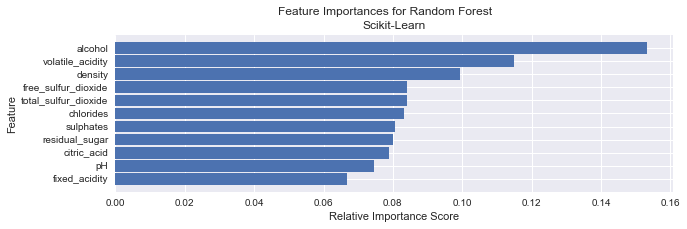

In [47]:
#Feature Importance
rf_feature_importances = rf.feature_importances_
rf_feature_names, rf_feature_scores = zip(*sorted(zip(feature_names,rf_feature_importances), key=lambda x: x[1]))
# plot the feature importance plots
f, (ax1) = plt.subplots(1, figsize=(10, 3))
t = f.suptitle('Feature Importances for Random Forest', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.6)
y_position = list(range(len(rf_feature_names)))
ax1.barh(y_position, rf_feature_scores, height=0.9, align='center',tick_label=rf_feature_names)
ax1.set_title("Scikit-Learn")
ax1.set_xlabel('Relative Importance Score')
ax1.set_ylabel('Feature')